<a href="https://colab.research.google.com/github/andreadosi1986/PrismaSVDUNet/blob/master/BrazilGTNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
!pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 390 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 103 kB/s 


In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.animation as animation
from matplotlib import rc
import rasterio
from rasterio import mask
import fiona
import skimage
from skimage.measure import regionprops
import random
import pandas as pd
from skimage import filters
import patchify
import tifffile as tiff
import tensorflow as tf
import keras
from patchify import patchify, unpatchify
from scipy.ndimage import rotate
import fiona
from rasterio.plot import reshape_as_image
import tensorflow.keras.utils

In [ ]:
numpy_cube = rasterio.open('/content/drive/MyDrive/datamining/prisma/Brazil/PRS_L2C_STD_20220521130548_20220521130552_0001_FULL.tif').read()

In [ ]:
numpy_cube.shape

(231, 1274, 1421)

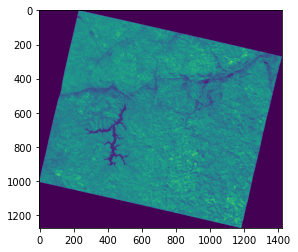

In [ ]:
plt.imshow(numpy_cube[50])
plt.show()

In [ ]:
#mining_cube = rasterio.open('/content/drive/MyDrive/datamining/prisma/Brazil/MiningBrazilArea.tif').read()
#water_cube = rasterio.open('/content/drive/MyDrive/datamining/prisma/Brazil/Water.tif').read()
#vegetations_cube = rasterio.open('/content/drive/MyDrive/datamining/prisma/Brazil/vegetations.tif').read()

In [ ]:
#print(mining_cube.shape, water_cube.shape, vegetations_cube.shape)

In [ ]:
#raster mask for future use
raster_mask = rasterio.open('/content/drive/MyDrive/datamining/prisma/Brazil/BrazilGTHighResolution.tif')

In [ ]:
#numpy array mask
brazil_mask = rasterio.open('/content/drive/MyDrive/datamining/prisma/Brazil/BrazilGTHighResolution.tif').read()

In [ ]:
brazil_mask.shape


(4, 1274, 1421)

In [ ]:
np.unique(brazil_mask[0])

array([  0, 180, 240, 250, 255], dtype=uint8)

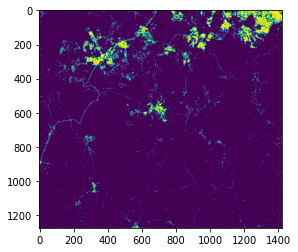

In [ ]:
plt.imshow(brazil_mask[0]==250)
plt.show()

In [ ]:
bg_mask = np.where(brazil_mask[0]==250, 0, 4)

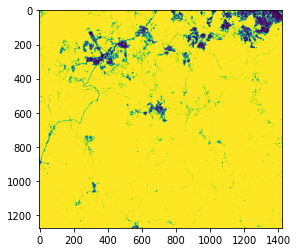

In [ ]:
plt.imshow(bg_mask)
plt.show()

In [ ]:
#THE MINING AREA shapefile
from rasterio import mask
import fiona
with fiona.open("/content/drive/MyDrive/datamining/prisma/Brazil/mining_shapefile.shp", "r") as shapefile:
    shapes_min_2 = [feature["geometry"] for feature in shapefile]
out_image_shapes_mining, out_transform_min_2 = rasterio.mask.mask(raster_mask, shapes_min_2, crop=False, indexes=1 )

#the little hypercube shape

out_image_shapes_mining.shape

(1274, 1421)

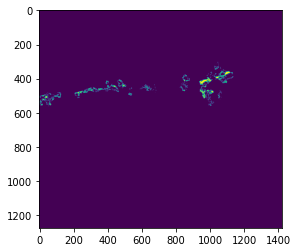

<class 'numpy.ndarray'> [  0 180 240 250 255]


In [ ]:
plt.imshow(out_image_shapes_mining==255)
plt.show()
print(type(out_image_shapes_mining), np.unique(out_image_shapes_mining))


In [ ]:
mining_mask = np.where(out_image_shapes_mining != 0, 1, 0)

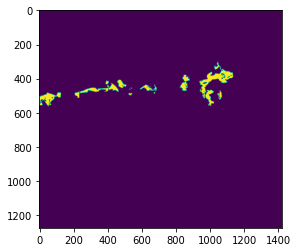

[0 1]


In [ ]:
plt.imshow(mining_mask)
plt.show()
print(np.unique(mining_mask))

In [ ]:
intermediate_mask = mining_mask + bg_mask
print(np.unique(intermediate_mask))

[0 1 4 5]


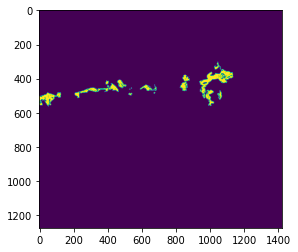

In [ ]:
plt.imshow(intermediate_mask==5)
plt.show()

In [ ]:
intermediate_mask = np.where(intermediate_mask == 5, 1, intermediate_mask)
intermediate_mask = np.where(intermediate_mask == 4, 2, intermediate_mask)

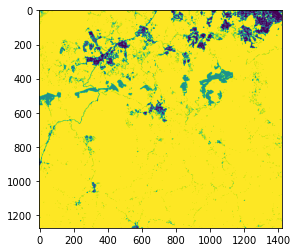

[0 1 2]


In [ ]:
plt.imshow(intermediate_mask)
plt.show()
print(np.unique(intermediate_mask))

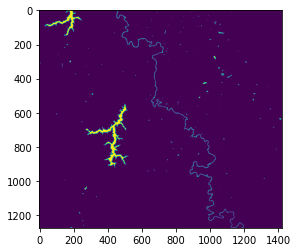

[  0  34  76 160 180 200 255]


In [ ]:

plt.imshow(brazil_mask[2]==200)
plt.show()
print(np.unique(brazil_mask[2]))

In [ ]:
water_mask = np.where(brazil_mask[2]==200, 3, 0)

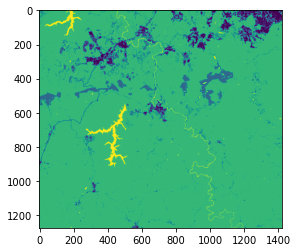

[0 1 2 3]


In [ ]:
final_mask = intermediate_mask + water_mask
final_mask =  np.where(final_mask == 5, 3, final_mask)

plt.imshow(final_mask)
plt.show()
print(np.unique(final_mask))

In [ ]:
#plt.figure(figsize = (20,10))
#plt.imshow(mining_cube[0]!=0)
#plt.show()
#plt.figure(figsize = (20,10))
#plt.imshow(water_cube[0]!=0)
#plt.show()
#plt.figure(figsize = (20,10))
#plt.imshow(vegetations_cube[0]!=0)
#plt.show()

In [ ]:
 rotate_int_mask = rotate(final_mask, angle=14.1, reshape=False, order=0)
 int_brazil_mask = rotate_int_mask[150:1100, 150:1100]

 rotate_np_array = rotate(numpy_cube[50], angle=14.1, reshape=False, order=0)
 brazil_array = rotate_np_array[150:1100, 150:1100]
 print(int_brazil_mask.shape, brazil_array.shape)

(950, 950) (950, 950)


In [ ]:
np.unique(int_brazil_mask)

array([0, 1, 2, 3])

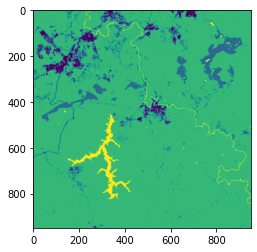

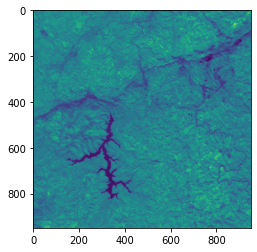

In [ ]:
plt.imshow(int_brazil_mask)
plt.show()
plt.imshow(brazil_array)
plt.show()

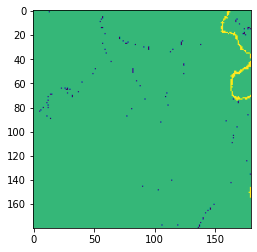

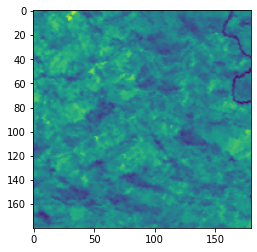

In [ ]:
#CHECK IF THE MASK IS CORRECT
import random
i = random.randint(0, 1247)
j = i + 200
if (j<1247):
  
  plt.imshow(int_brazil_mask[i:j, i:j])
  plt.show()
  plt.imshow(brazil_array[i:j, i:j])
  plt.show()

In [ ]:
np.save('/content/drive/MyDrive/datamining/prisma/Brazil/BrazilGtHighResolution', int_brazil_mask)

In [ ]:
################# FIN QUI ######################################